# Análise da Presença Feminina nos Cursos de TI

Este notebook é uma continuação da análise iniciada com os dados do ENEM, onde observamos o desempenho de meninas e meninos nas provas de exatas.

Agora, avançamos para uma etapa decisiva: a escolha do curso superior. A pergunta que guia esta análise é simples, porém poderosa:

**As meninas que se destacam nas áreas de exatas no ENEM estão, de fato, ocupando vagas nos cursos de Tecnologia da Informação?**

Para isso, analisaremos os dados do Censo da Educação Superior, observando especialmente os ingressantes nos cursos da área de TI, divididos por gênero.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [168]:
caminho = "../data/raw/MICRODADOS_CADASTRO_CURSOS_2023.csv"

# Ler só algumas linhas para entender as colunas
df_head = pd.read_csv(caminho, sep=';', nrows=10, encoding='latin1')
print(df_head.columns)

Index(['NU_ANO_CENSO', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF',
       'NO_MUNICIPIO', 'CO_MUNICIPIO', 'IN_CAPITAL', 'TP_DIMENSAO',
       ...
       'QT_MAT_APOIO_SOCIAL', 'QT_CONC_APOIO_SOCIAL',
       'QT_ATIV_EXTRACURRICULAR', 'QT_ING_ATIV_EXTRACURRICULAR',
       'QT_MAT_ATIV_EXTRACURRICULAR', 'QT_CONC_ATIV_EXTRACURRICULAR',
       'QT_MOB_ACADEMICA', 'QT_ING_MOB_ACADEMICA', 'QT_MAT_MOB_ACADEMICA',
       'QT_CONC_MOB_ACADEMICA'],
      dtype='object', length=202)


In [169]:
colunas_usadas = [
    'NO_CURSO',
    'NO_CINE_ROTULO',
    'QT_ING_FEM',
    'QT_ING_MASC'
]

In [171]:
df = pd.read_csv(caminho, sep=';', usecols=colunas_usadas, encoding='latin1')

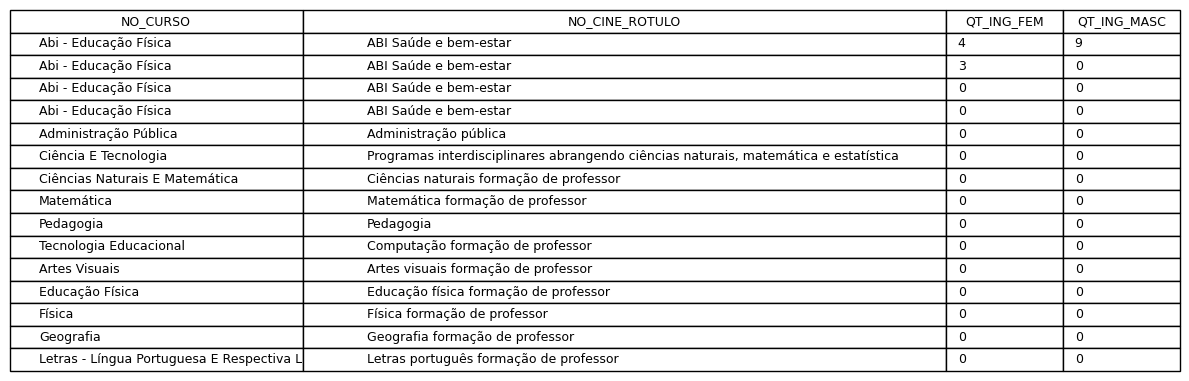

In [172]:
import matplotlib.pyplot as plt

# Seleciona apenas algumas colunas do dataframe
colunas_exibidas = ['NO_CURSO', 'NO_CINE_ROTULO', 'QT_ING_FEM', 'QT_ING_MASC']
df_amostra = df[colunas_exibidas].head(15)  # pega os primeiros 15 para exibição

# Configura figura e eixo
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')  # remove os eixos

# Largura proporcional das colunas (a segunda é maior)
col_widths = [0.25, 0.55, 0.1, 0.1]

# Cria a tabela
tabela = ax.table(cellText=df_amostra.values,
                  colLabels=df_amostra.columns,
                  loc='center',
                  cellLoc='left',
                  colWidths=col_widths)

tabela.auto_set_font_size(False)
tabela.set_fontsize(9)
tabela.scale(1, 1.5)  # aumenta altura das linhas

plt.tight_layout()
plt.show()

In [173]:
# Lista de palavras-chave para identificar cursos de TI
palavras_chave = [
    'computação',
    'informação',
    'sistemas',
    'software',
    'análise e desenvolvimento',
    'tecnologia da informação',
    'engenharia de computação',
    'ciência de dados',
    'banco de dados',
    'segurança da informação',
    'dados'
]

# Filtrar cursos cujo nome contém uma das palavras-chave
df_ti = df[df['NO_CURSO'].str.lower().str.contains('|'.join(palavras_chave))]
print(df_ti)

                                     NO_CURSO  \
43                   Computação E Informática   
48                            Gestão De Dados   
55                     Sistemas De Informação   
80                   Computação E Informática   
119                    Sistemas De Computação   
...                                       ...   
671486  Análise E Desenvolvimento De Sistemas   
671519     Gestão Da Tecnologia Da Informação   
671554                Segurança Da Informação   
671559                 Sistemas De Informação   
671605     Gestão Da Tecnologia Da Informação   

                            NO_CINE_ROTULO  QT_ING_FEM  QT_ING_MASC  
43        Computação formação de professor           0            0  
48                      Gestão estratégica           0            0  
55                  Sistemas de informação           0            0  
80        Computação formação de professor           0            0  
119                 Sistemas de informação           0       

In [174]:
resultado_ti = df_ti.groupby('NO_CURSO')[['QT_ING_FEM', 'QT_ING_MASC']].sum().reset_index()


# Adicionar total
resultado_ti['TOTAL'] = resultado_ti['QT_ING_FEM'] + resultado_ti['QT_ING_MASC']

print(resultado_ti)



                                           NO_CURSO  QT_ING_FEM  QT_ING_MASC  \
0                       Abi - Ciência Da Computação          11           53   
1     Administração Em Sistemas E Serviços De Saúde           5            9   
2                                    Agrocomputação         223          555   
3                                  Análise De Dados          11           23   
4             Análise E Desenvolvimento De Sistemas       45901       173082   
..                                              ...         ...          ...   
77                                  Sistemas Navais          21           46   
78                           Sistemas Para Internet        1834         5557   
79                         Tecnologia Da Informação         220          700   
80  Tecnologia Da Informação Para Negócios Digitais           0            4   
81          Tecnologias Da Informação E Comunicação          38           91   

     TOTAL  
0       64  
1       14  


In [175]:
resultado_ti_filtrado = resultado_ti[
    ~((resultado_ti['QT_ING_FEM'] == 0) & (resultado_ti['QT_ING_MASC'] == 0))
]

resultado_ti = resultado_ti_filtrado

In [176]:
# Ordenar por total de ingressantes
resultado_ti = resultado_ti.sort_values(by='TOTAL', ascending=False)
print(resultado_ti)

                                           NO_CURSO  QT_ING_FEM  QT_ING_MASC  \
4             Análise E Desenvolvimento De Sistemas       45901       173082   
51               Gestão Da Tecnologia Da Informação       12093        31593   
12                            Ciência Da Computação        7032        35195   
42                           Engenharia De Software        6514        31081   
72                           Sistemas De Informação        6054        22868   
..                                              ...         ...          ...   
41             Engenharia De Sistemas Ciber Físicos           3           17   
28                               Computação Gráfica           6           12   
55                 Interdisciplinar Em Biossistemas          10            5   
1     Administração Em Sistemas E Serviços De Saúde           5            9   
80  Tecnologia Da Informação Para Negócios Digitais           0            4   

     TOTAL  
4   218983  
51   43686  


In [177]:
resultado_ti.to_csv('../data/processed/curso_superior_filtrado.csv', index=False, encoding='utf-8')

## Panorama Geral dos Ingressantes em Cursos de TI

A primeira etapa desta análise é observar o total de ingressantes do sexo feminino e masculino em cursos relacionados à área de Tecnologia da Informação.

A partir disso, será possível entender se há equilíbrio ou desequilíbrio de gênero logo no início da trajetória universitária em TI.

Os dados englobam diferentes cursos da área (como Ciência da Computação, Sistemas de Informação, Engenharia da Computação, etc.), consolidados pelo rótulo do CINE (Classificação Internacional Normalizada da Educação).

In [179]:
resultado_ti['PERC_FEM'] = (resultado_ti['QT_ING_FEM'] / resultado_ti['TOTAL']) * 100

/var/folders/99/cdjmtrk17ss1sh19v_wrtv9r0000gn/T/ipykernel_34429/4093717622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


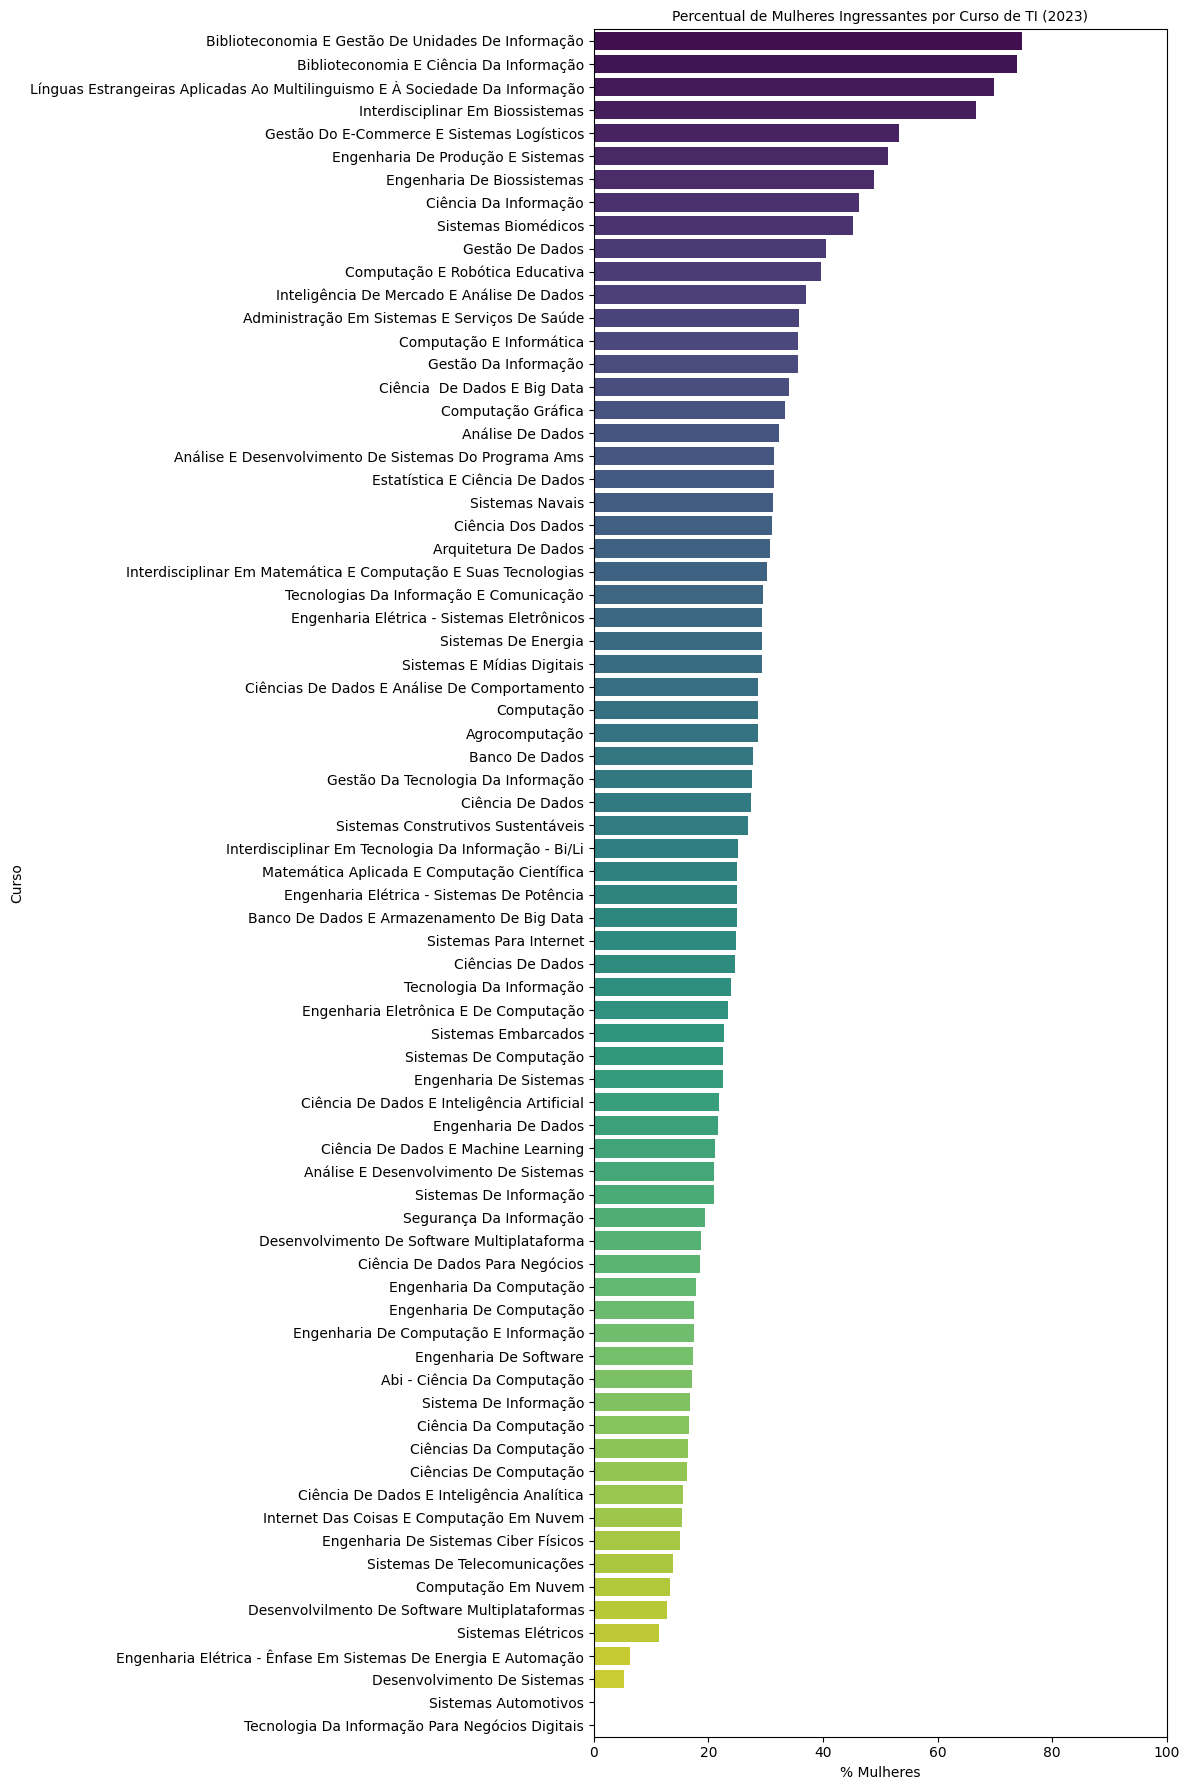

In [180]:
plt.figure(figsize=(12, 18))
sns.barplot(
    data=resultado_ti.sort_values('PERC_FEM', ascending=False),
    x='PERC_FEM',
    y='NO_CURSO',
    palette='viridis'
)

plt.title('Percentual de Mulheres Ingressantes por Curso de TI (2023)', fontsize=10)
plt.xlabel('% Mulheres')
plt.ylabel('Curso')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

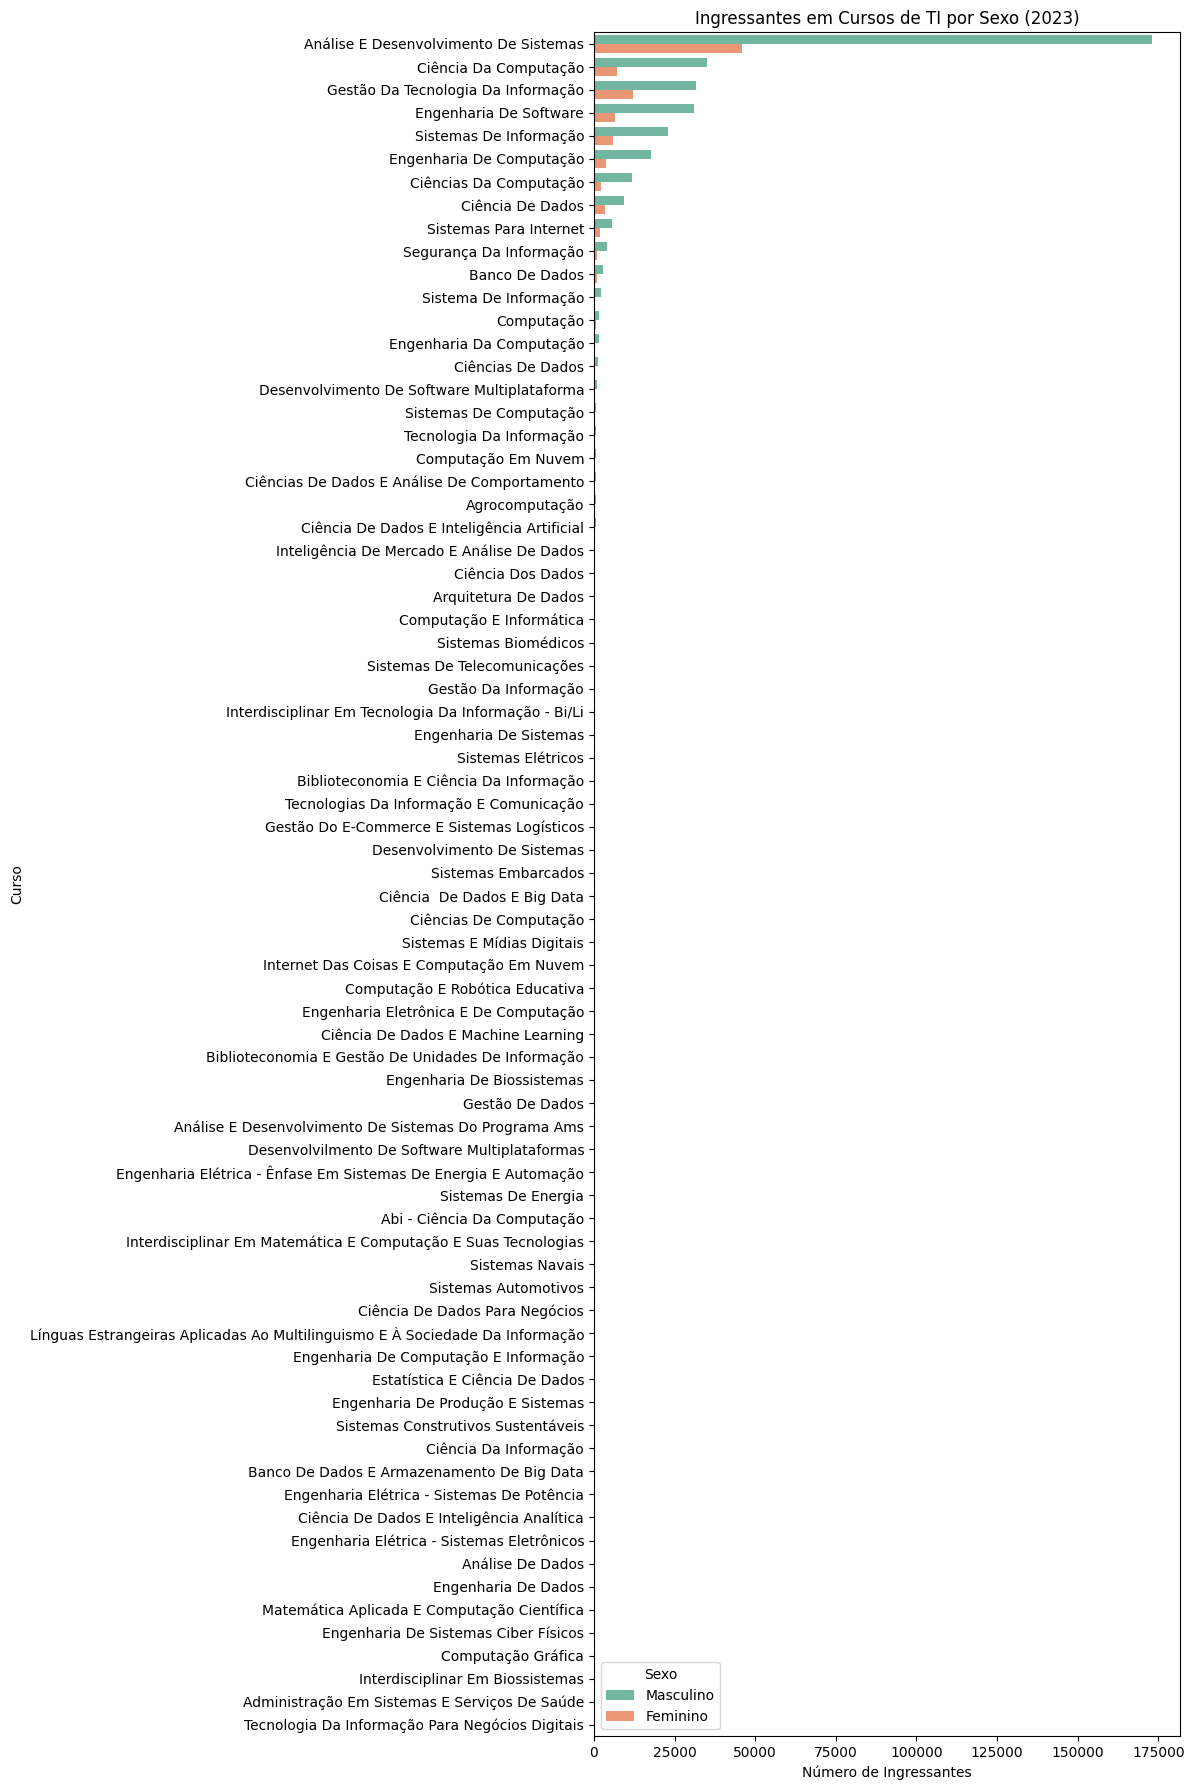

In [181]:
# Converter para formato "long" para facilitar o gráfico
df_long = resultado_ti.melt(
    id_vars='NO_CURSO',
    value_vars=['QT_ING_FEM', 'QT_ING_MASC'],
    var_name='Sexo',
    value_name='Ingressantes'
)

# Renomear para legenda mais amigável
df_long['Sexo'] = df_long['Sexo'].replace({
    'QT_ING_FEM': 'Feminino',
    'QT_ING_MASC': 'Masculino'
})

plt.figure(figsize=(12, 18))
sns.barplot(
    data=df_long.sort_values(by='Ingressantes', ascending=False),
    x='Ingressantes',
    y='NO_CURSO',
    hue='Sexo',
    palette='Set2'
)

plt.title('Ingressantes em Cursos de TI por Sexo (2023)', fontsize=12)
plt.xlabel('Número de Ingressantes')
plt.ylabel('Curso')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

In [182]:
resultado_ti['DISTANCIA_50'] = abs(resultado_ti['PERC_FEM'] - 50)

print(resultado_ti.sort_values('DISTANCIA_50').head(10)[['NO_CURSO', 'PERC_FEM']])

                                         NO_CURSO   PERC_FEM
33                     Engenharia De Biossistemas  48.905109
39              Engenharia De Produção E Sistemas  51.388889
53     Gestão Do E-Commerce E Sistemas Logísticos  53.216374
13                          Ciência Da Informação  46.296296
68                            Sistemas Biomédicos  45.142857
52                                Gestão De Dados  40.517241
26                Computação E Robótica Educativa  39.682540
54     Inteligência De Mercado E Análise De Dados  36.970684
1   Administração Em Sistemas E Serviços De Saúde  35.714286
25                       Computação E Informática  35.686275


In [183]:
top10 = resultado_ti.sort_values('TOTAL', ascending=False).head(10)

/var/folders/99/cdjmtrk17ss1sh19v_wrtv9r0000gn/T/ipykernel_34429/2436998485.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


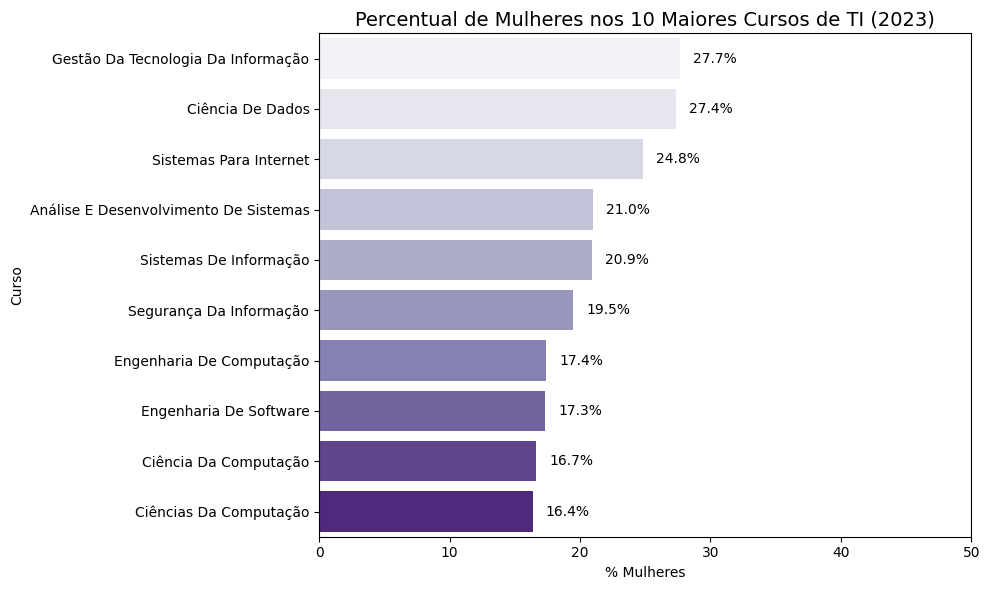

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar pelos maiores percentuais femininos
top10_percentual = top10.sort_values('PERC_FEM', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top10_percentual,
    x='PERC_FEM',
    y='NO_CURSO',
    palette=sns.color_palette("Purples", n_colors=10)
)

# Adicionar rótulos nas barras
for i, row in enumerate(top10_percentual.itertuples()):
    ax.text(row.PERC_FEM + 1, i, f"{row.PERC_FEM:.1f}%", va='center', fontsize=10)

plt.title('Percentual de Mulheres nos 10 Maiores Cursos de TI (2023)', fontsize=14)
plt.xlabel('% Mulheres')
plt.ylabel('Curso')
plt.xlim(0, 50)  # Limite para reforçar a diferença
plt.tight_layout()
plt.show()

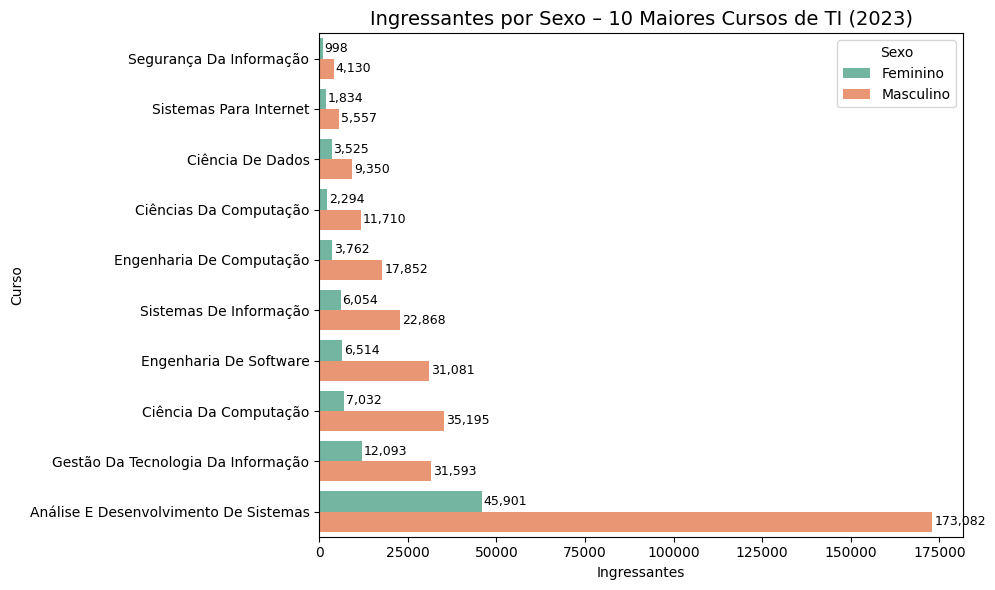

In [185]:
# Organizar por TOTAL
top10_ordenado = top10.sort_values(by='TOTAL', ascending=True)  # de baixo pra cima

# Transformar em formato longo
df_top10_long = top10_ordenado.melt(
    id_vars='NO_CURSO',
    value_vars=['QT_ING_FEM', 'QT_ING_MASC'],
    var_name='Sexo',
    value_name='Ingressantes'
)

# Traduzir nomes
df_top10_long['Sexo'] = df_top10_long['Sexo'].replace({
    'QT_ING_FEM': 'Feminino',
    'QT_ING_MASC': 'Masculino'
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_top10_long,
    x='Ingressantes',
    y='NO_CURSO',
    hue='Sexo',
    palette='Set2'
)

# Adicionar rótulos nas barras
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 500, p.get_y() + p.get_height() / 2,
                f'{int(width):,}', va='center', fontsize=9)

plt.title('Ingressantes por Sexo – 10 Maiores Cursos de TI (2023)', fontsize=14)
plt.xlabel('Ingressantes')
plt.ylabel('Curso')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

## Conclusão: O Descompasso da Jornada

Ao cruzarmos os dados do ENEM com os dados de ingresso no ensino superior, o cenário se revela mais complexo do que aparenta.

Apesar das boas médias femininas nas disciplinas de exatas durante o ENEM — muitas vezes superiores às dos meninos —, a realidade da universidade mostra um descompasso.

Cursos ligados à Tecnologia da Informação continuam sendo amplamente dominados por homens. A discrepância no número de ingressantes reflete uma barreira silenciosa, onde desempenho acadêmico não se traduz, necessariamente, em representatividade.

Alice é uma entre poucas em sua sala. E talvez a pergunta mais importante que esses dados nos ajudam a formular não seja apenas "quantas entraram?", mas sim: **quantas deixaram de entrar — e por quê?**